In [1]:
import pandas as pd
import pylab as plt
#plt.style.use('dark_background')
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns

def getCI(df,xvar,yvar,alpha=.05):
    '''Get CI bounds for OLS regresssion
    
    Args:
        df (pandas.DataFrame): input dataframe
        xvar (str): x variable name
        yvar (str): y variable name
        alpha (float): significance level float

    Returns:
        pandas.DataFrame: x, pred,ub,lb
        statsmodels.regression.linear_model.OLSResults
    '''
    import pandas as pd
    import statsmodels.api as sm
    
    df = rf.sort_values(xvar)
    X = sm.add_constant(df[xvar].values)
    ols_model = sm.OLS(df[yvar].values, X)
    est = ols_model.fit()
    print(est.f_test(np.identity(2)))
    print(est.t_test([1, 0]))
    out = est.conf_int(alpha=alpha, cols=None)
    y_pred = est.predict(X)
    x_pred = df[xvar].values
    pred = est.get_prediction(X).summary_frame()
    predf=pd.DataFrame({'pred': est.params[0]+x_pred*est.params[1],
                        'lb':pred['mean_ci_lower'].values,
                        'ub':pred['mean_ci_upper'].values},
                       index=x_pred)
    return predf,est


In [2]:
rf=pd.read_csv('./irat_predictions.csv',index_col=0)
import numpy as np
rf=rf.replace(-1,np.nan).dropna()
rf['Geometric Mean'] = -1*rf['Geometric Mean']
rf.columns

Index(['Influenza Virus', 'Virus Type', 'Dates of Risk Assessment',
       'Potential Emergence Estimate', 'Potential Impact Estimate',
       'Summary Risk Score Category', 'HA Sequence', 'NA Sequence',
       'HA Qnet Sample', 'NA Qnet Sample', 'HA Average Qdistance',
       'NA Average Qdistance', 'Both Average Qdistance', 'Geometric Mean',
       'Predicted Emergence Score', 'Predicted Impact Score'],
      dtype='object')

<AxesSubplot:xlabel='Potential Emergence Estimate', ylabel='Predicted Emergence Score'>

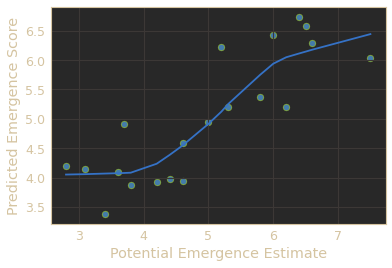

In [3]:
rf.plot.scatter(x='Potential Emergence Estimate',y='Predicted Emergence Score',color='g',s=50)
sns.regplot(x='Potential Emergence Estimate',y='Predicted Emergence Score',data=rf,lowess=1)

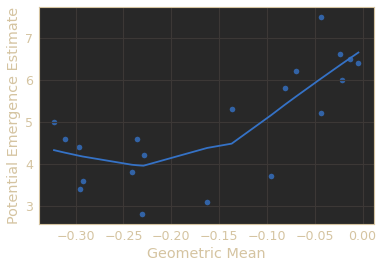

In [4]:
#rf.plot.scatter(y='Potential Emergence Estimate',x='Geometric Mean',color='g',s=50)
ax=sns.regplot(y='Potential Emergence Estimate',x='Geometric Mean',data=rf,lowess=1)


<F test: F=276.4410354475557, p=3.0798879163781343e-14, df_denom=18, df_num=2>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             6.2259      0.366     16.994      0.000       5.456       6.996


<AxesSubplot:xlabel='Geometric Mean'>

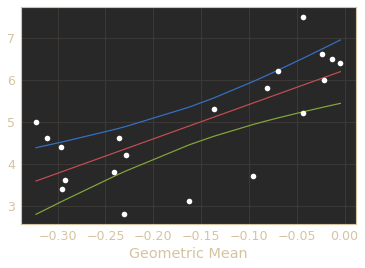

In [5]:
import matplotlib.pyplot as plt

xvar='Geometric Mean'
yvar='Potential Emergence Estimate'


pred,est=getCI(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
pred.ub.plot()
pred.lb.plot()
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')

In [6]:
print(est.aic,est.bic)

56.80823848467042 58.7997030317784


In [7]:
print(est.params)

[6.22589433 8.19077236]


In [9]:
np.corrcoef(pred.pred,rf[yvar])[0,1]

-0.9748211718534742

In [11]:
rf

,Influenza Virus,Virus Type,Dates of Risk Assessment,Potential Emergence Estimate,Potential Impact Estimate,Summary Risk Score Category,HA Sequence,NA Sequence,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean,Predicted Emergence Score,Predicted Impact Score
0,A/swine/Shandong/1207/2016,H1N1,Jul 2020,7.5,6.9,Moderate,MEARLFVLFCAFTTLKADTICVGYHANNSTDTVDTILEKNVTVTHS...,MNPNQKIITIGSICMTIGIASLILQIGNIISIWISHSIQIENQNQS...,1000.0,1000.0,0.094135,0.020530,0.057332,-0.043961,6.043770,6.187258
1,A/Ohio/13/2017,H3N2,Jul 2019,6.6,5.8,Moderate,MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSP...,1000.0,1000.0,0.018431,0.030623,0.024527,-0.023757,6.286471,6.153447
2,A/Hong Kong/125/2017,H7N9,May 2017,6.5,7.5,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAITIGAIAVLIGIANLGLNIGLHLKPGCNCSHS...,437.0,437.0,0.029599,0.005775,0.017687,-0.013074,6.585211,6.540149
3,A/Shanghai/02/2013,H7N9,Apr 2016,6.4,7.2,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAIIIGAIAVLIGMANLGLNIGLHLKPGCNCSHS...,178.0,178.0,0.005495,0.003556,0.004525,-0.004420,6.740483,6.620085
4,A/Anhui-Lujiang/39/2018,H9N2,Jul 2019,6.2,5.9,Moderate,METVSLITILLVATASNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,31.0,30.0,0.029024,0.168090,0.098557,-0.069847,5.196902,5.002380
5,A/Indiana/08/2011,H3N2,Dec 2012,6.0,4.5,Moderate,MKTIIAFSCILCLIFAQKLPGSDNSMATLCLGHHAVPNGTLVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTVTLHFKQHDYNSPP...,1000.0,1000.0,0.052311,0.009103,0.030707,-0.021822,6.431361,6.457251
6,A/California/62/2018,H1N2,Jul 2019,5.8,5.7,Moderate,MKVKLMVLLCTFTATYADTICVGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSISLTLAAMCFLMQTAILVTNVTLHFNQCECHYPP...,55.0,55.0,0.108902,0.060951,0.084926,-0.081472,5.363065,5.483384
8,A/Sichuan/06681/2021,H5N6,Oct 2021,5.3,6.3,Moderate,MENIVLLLAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKITCISATGVTLSIVSLLIGITNLGLNIGLHYKVSDSTTIN...,45.0,45.0,0.361591,0.051794,0.206692,-0.136852,5.202812,6.415099
9,A/Vietnam/1203/2004,H5N1,Nov 2011,5.2,6.6,Moderate,MEKIVLLFAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSICMVTGIVSLMLQIGNMISIWVSHSIHTGNQHQS...,258.0,246.0,0.167254,0.011074,0.091342,-0.043037,6.218132,6.701150
10,A/Yunnan/14564/2015,H5N6,Apr 2016,5.0,6.6,Moderate,MEKMVLLLAAVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKITCISATGVTLSVVSLLIGIANLGLNIGLHYKVSDSTTIN...,344.0,331.0,0.348234,0.298682,0.323934,-0.322508,4.945633,6.544652


In [12]:
est.f_test(np.identity(2))

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=276.4410354475557, p=3.0798879163781343e-14, df_denom=18, df_num=2>

In [13]:
est.fvalue

18.803883896340874

In [14]:
est.pvalues

array([1.57011796e-12, 3.97736229e-04])

In [15]:
est.f_pvalue

0.00039773622938923687

<F test: F=455.745265702368, p=3.8304325181657367e-16, df_denom=18, df_num=2>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.2630      0.820     -0.321      0.752      -1.986       1.460


<AxesSubplot:xlabel='Predicted Emergence Score'>

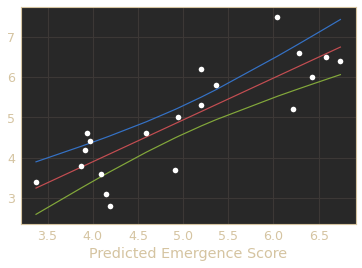

In [16]:
yvar='Potential Emergence Estimate'
xvar='Predicted Emergence Score'

pred,est=getCI(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
pred.ub.plot()
pred.lb.plot()
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')

In [17]:
est.f_pvalue

4.325698554287528e-06

In [18]:
est.params

array([-0.26297038,  1.03961548])

In [19]:
est.fvalue

41.92281654060438

In [20]:
est.pvalues

array([7.52151911e-01, 4.32569855e-06])

<F test: F=462.6438694507776, p=3.354708903358894e-16, df_denom=18, df_num=2>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.3606      1.027     -0.351      0.730      -2.519       1.798


<AxesSubplot:xlabel='Predicted Impact Score'>

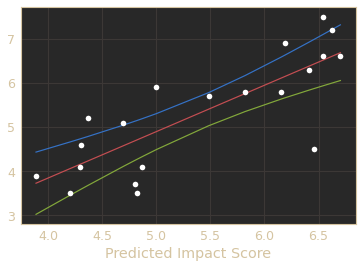

In [21]:
yvar='Potential Impact Estimate'
xvar='Predicted Impact Score'
    
pred,est=getCI(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
pred.ub.plot()
pred.lb.plot()
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')

In [22]:
est.f_pvalue

2.4816298822674793e-05

In [23]:
est.params

array([-0.36057476,  1.05119118])

In [24]:
est.pvalues

array([7.29692220e-01, 2.48162988e-05])